## BOSTON HOUSING

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as ms
%matplotlib inline

In [2]:
data=pd.read_csv('train.csv')

In [3]:
data.head(20)

,ID,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
3,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
4,7,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,22.9
5,11,0.22489,12.5,7.87,0,0.524,6.377,94.3,6.3467,5,311,15.2,392.52,20.45,15.0
6,12,0.11747,12.5,7.87,0,0.524,6.009,82.9,6.2267,5,311,15.2,396.90,13.27,18.9
7,13,0.09378,12.5,7.87,0,0.524,5.889,39.0,5.4509,5,311,15.2,390.50,15.71,21.7
8,14,0.62976,0.0,8.14,0,0.538,5.949,61.8,4.7075,4,307,21.0,396.90,8.26,20.4
9,15,0.63796,0.0,8.14,0,0.538,6.096,84.5,4.4619,4,307,21.0,380.02,10.26,18.2


In [4]:
data.tail()

,ID,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
328,500,0.17783,0.0,9.69,0,0.585,5.569,73.5,2.3999,6,391,19.2,395.77,15.10,17.5
329,502,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
330,503,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
331,504,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
332,506,0.04741,0.0,11.93,0,0.573,6.030,80.8,2.5050,1,273,21.0,396.90,7.88,11.9


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 333 entries, 0 to 332
Data columns (total 15 columns):
ID         333 non-null int64
crim       333 non-null float64
zn         333 non-null float64
indus      333 non-null float64
chas       333 non-null int64
nox        333 non-null float64
rm         333 non-null float64
age        333 non-null float64
dis        333 non-null float64
rad        333 non-null int64
tax        333 non-null int64
ptratio    333 non-null float64
black      333 non-null float64
lstat      333 non-null float64
medv       333 non-null float64
dtypes: float64(11), int64(4)
memory usage: 39.1 KB


In [6]:
data.describe()

,ID,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
count,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000
mean,250.951952,3.360341,10.689189,11.293483,0.060060,0.557144,6.265619,68.226426,3.709934,9.633634,409.279279,18.448048,359.466096,12.515435,22.768769
std,147.859438,7.352272,22.674762,6.998123,0.237956,0.114955,0.703952,28.133344,1.981123,8.742174,170.841988,2.151821,86.584567,7.067781,9.173468
min,1.000000,0.006320,0.000000,0.740000,0.000000,0.385000,3.561000,6.000000,1.129600,1.000000,188.000000,12.600000,3.500000,1.730000,5.000000
25%,123.000000,0.078960,0.000000,5.130000,0.000000,0.453000,5.884000,45.400000,2.122400,4.000000,279.000000,17.400000,376.730000,7.180000,17.400000
50%,244.000000,0.261690,0.000000,9.900000,0.000000,0.538000,6.202000,76.700000,3.092300,5.000000,330.000000,19.000000,392.050000,10.970000,21.600000
75%,377.000000,3.678220,12.500000,18.100000,0.000000,0.631000,6.595000,93.800000,5.116700,24.000000,666.000000,20.200000,396.240000,16.420000,25.000000
max,506.000000,73.534100,100.000000,27.740000,1.000000,0.871000,8.725000,100.000000,10.710300,24.000000,711.000000,21.200000,396.900000,37.970000,50.000000


In [7]:
data.corr()

,ID,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
ID,1.000000,0.456312,-0.155639,0.421978,0.007958,0.440185,-0.112790,0.257300,-0.356461,0.707526,0.686246,0.309838,-0.271619,0.281953,-0.221694
crim,0.456312,1.000000,-0.210913,0.422228,-0.041195,0.463001,-0.310180,0.379034,-0.397067,0.666636,0.617081,0.313409,-0.475796,0.532077,-0.407454
zn,-0.155639,-0.210913,1.000000,-0.518679,-0.024442,-0.501990,0.328197,-0.544513,0.637142,-0.303663,-0.311180,-0.380449,0.168130,-0.388112,0.344842
indus,0.421978,0.422228,-0.518679,1.000000,0.037496,0.750087,-0.440365,0.638378,-0.702327,0.569779,0.708313,0.391087,-0.335049,0.614155,-0.473932
chas,0.007958,-0.041195,-0.024442,0.037496,1.000000,0.080275,0.112251,0.068286,-0.081834,0.007714,-0.021826,-0.125067,0.062029,-0.050055,0.204390
nox,0.440185,0.463001,-0.501990,0.750087,0.080275,1.000000,-0.338515,0.736000,-0.769364,0.612180,0.670722,0.192513,-0.369416,0.598874,-0.413054
rm,-0.112790,-0.310180,0.328197,-0.440365,0.112251,-0.338515,1.000000,-0.248573,0.269191,-0.272783,-0.356987,-0.366927,0.155202,-0.615747,0.689598
age,0.257300,0.379034,-0.544513,0.638378,0.068286,0.736000,-0.248573,1.000000,-0.764208,0.447380,0.511893,0.259293,-0.268054,0.588834,-0.358888
dis,-0.356461,-0.397067,0.637142,-0.702327,-0.081834,-0.769364,0.269191,-0.764208,1.000000,-0.477610,-0.529539,-0.231101,0.284374,-0.505939,0.249422
rad,0.707526,0.666636,-0.303663,0.569779,0.007714,0.612180,-0.272783,0.447380,-0.477610,1.000000,0.903562,0.470849,-0.406405,0.484568,-0.352251


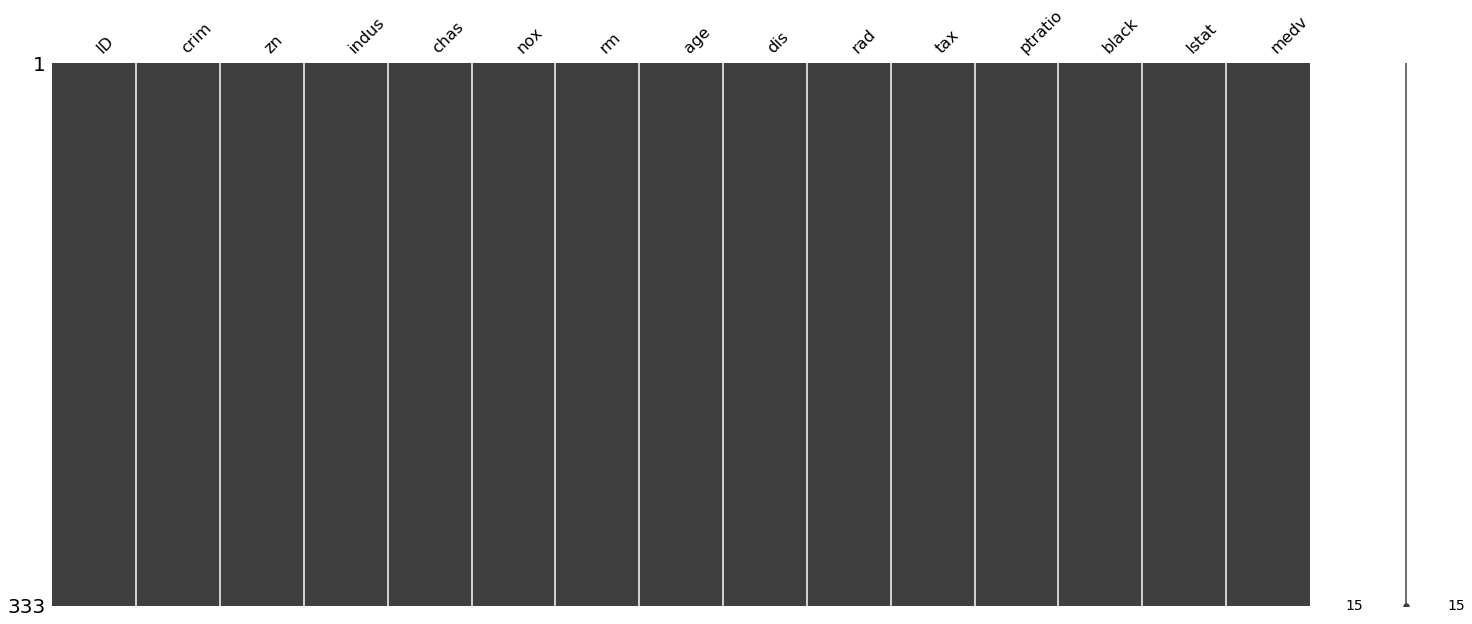

In [8]:
ms.matrix(data)

In [9]:
data['crim'].unique()

array([  6.32000000e-03,   2.73100000e-02,   3.23700000e-02,
         6.90500000e-02,   8.82900000e-02,   2.24890000e-01,
         1.17470000e-01,   9.37800000e-02,   6.29760000e-01,
         6.37960000e-01,   6.27390000e-01,   1.05393000e+00,
         8.02710000e-01,   1.25179000e+00,   8.52040000e-01,
         1.23247000e+00,   9.88430000e-01,   9.55770000e-01,
         1.13081000e+00,   1.35472000e+00,   1.61282000e+00,
         1.75050000e-01,   2.76300000e-02,   3.35900000e-02,
         1.41500000e-01,   1.59360000e-01,   1.22690000e-01,
         1.71420000e-01,   1.88360000e-01,   2.29270000e-01,
         2.19770000e-01,   8.87300000e-02,   4.33700000e-02,
         4.98100000e-02,   1.36000000e-02,   1.31100000e-02,
         2.05500000e-02,   1.43200000e-02,   1.54450000e-01,
         1.49320000e-01,   1.71710000e-01,   1.26500000e-01,
         1.95100000e-02,   3.58400000e-02,   4.37900000e-02,
         5.78900000e-02,   1.35540000e-01,   8.82600000e-02,
         9.16400000e-02,

In [10]:
data['indus'].value_counts()

18.10    88
19.58    21
6.20     14
8.14     13
21.89    10
9.90      9
3.97      8
8.56      8
5.86      7
6.91      7
4.05      7
25.65     6
10.59     6
2.46      6
5.19      6
10.01     6
2.18      5
3.44      5
4.49      4
11.93     4
7.38      4
5.13      4
7.87      4
27.74     4
12.83     4
3.41      3
3.33      3
9.69      3
13.92     3
10.81     3
         ..
15.04     2
2.68      2
3.37      2
2.95      2
4.95      2
6.07      2
2.93      2
2.97      1
1.89      1
1.38      1
1.32      1
5.96      1
1.69      1
1.25      1
2.25      1
1.22      1
2.03      1
7.07      1
5.32      1
0.74      1
1.47      1
2.89      1
1.76      1
2.31      1
1.21      1
13.89     1
4.15      1
2.01      1
6.41      1
4.00      1
Name: indus, Length: 68, dtype: int64

In [11]:
data['tax'].unique()

array([296, 242, 222, 311, 307, 279, 252, 233, 243, 469, 226, 313, 256,
       284, 216, 337, 345, 305, 398, 281, 247, 270, 276, 384, 432, 188,
       437, 403, 193, 265, 329, 402, 348, 224, 277, 300, 330, 264, 223,
       254, 198, 285, 241, 293, 245, 289, 304, 287, 430, 422, 370, 351,
       280, 335, 411, 666, 711, 391, 273], dtype=int64)

In [12]:
data['tax'].value_counts()

666    88
307    27
403    21
437    10
398     9
304     9
224     8
264     8
296     8
384     8
233     7
330     7
188     6
432     6
193     6
277     6
284     5
270     5
222     5
287     4
216     4
329     4
311     4
711     4
273     4
300     4
247     4
281     3
305     3
289     3
243     3
223     3
391     3
337     2
345     2
276     2
370     2
265     2
252     2
430     2
245     2
226     1
198     1
241     1
242     1
469     1
254     1
256     1
279     1
280     1
293     1
313     1
335     1
348     1
351     1
402     1
411     1
422     1
285     1
Name: tax, dtype: int64

In [13]:
data['rad'].mean()

9.633633633633634

Text(0.5,1,'data corr()')

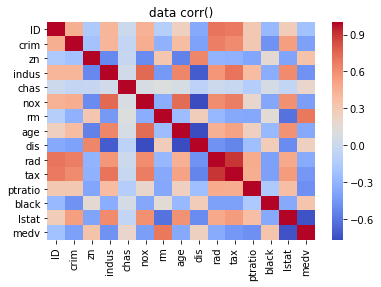

In [14]:
sns.heatmap(data.corr(),cmap='coolwarm')
plt.title('data corr()')

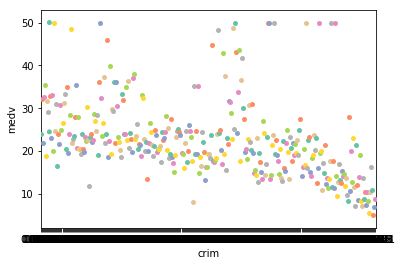

In [15]:
sns.swarmplot
sns.swarmplot(x='crim',y='medv',data=data,palette='Set2')

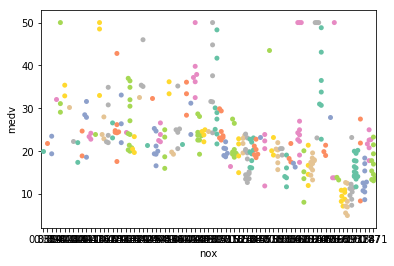

In [16]:
sns.swarmplot
sns.swarmplot(x='nox',y='medv',data=data,palette='Set2')

In [17]:
data["rad"].where(data["rad"] <5, data["rad"].median(), inplace=True)
data["rad"].head()

0    1
1    2
2    3
3    3
4    5
Name: rad, dtype: int64

In [18]:
data['black'].where(data['black'] <300, data['black'].median(),inplace=True)

In [19]:
data['zn'].where(data['zn'] >0,data['zn'].std(),inplace=True )

In [20]:
data['tax'].where(data['tax'] <300,data['tax'].mean(),inplace=True)

In [21]:
data['crim'].where(data['crim']<5,data['crim'].mean(),inplace=True)

In [22]:
data['indus'].where(data['crim']<10,data['crim'].median(),inplace=True)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000018DBBD2E668>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x0000018DBB99F588>]], dtype=object)

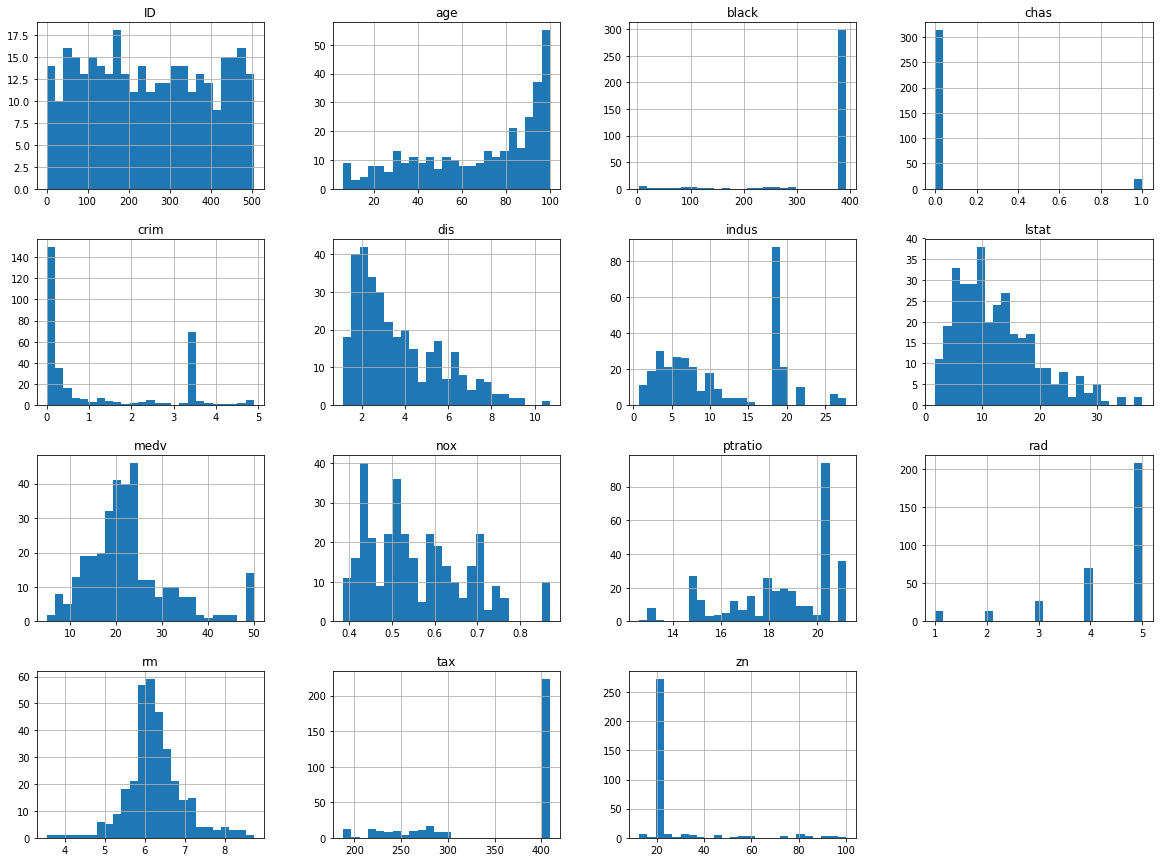

In [23]:
data.hist(bins=25, figsize=(20,15))

In [24]:
## data.drop('chas',axis=1,inplace=True)

In [25]:
## data.drop('black',axis=1,inplace=True)

In [26]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 333 entries, 0 to 332
Data columns (total 15 columns):
ID         333 non-null int64
crim       333 non-null float64
zn         333 non-null float64
indus      333 non-null float64
chas       333 non-null int64
nox        333 non-null float64
rm         333 non-null float64
age        333 non-null float64
dis        333 non-null float64
rad        333 non-null int64
tax        333 non-null float64
ptratio    333 non-null float64
black      333 non-null float64
lstat      333 non-null float64
medv       333 non-null float64
dtypes: float64(12), int64(3)
memory usage: 39.1 KB


In [27]:
from sklearn.model_selection import train_test_split

In [28]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 333 entries, 0 to 332
Data columns (total 15 columns):
ID         333 non-null int64
crim       333 non-null float64
zn         333 non-null float64
indus      333 non-null float64
chas       333 non-null int64
nox        333 non-null float64
rm         333 non-null float64
age        333 non-null float64
dis        333 non-null float64
rad        333 non-null int64
tax        333 non-null float64
ptratio    333 non-null float64
black      333 non-null float64
lstat      333 non-null float64
medv       333 non-null float64
dtypes: float64(12), int64(3)
memory usage: 39.1 KB


In [29]:
X_train, X_test, y_train, y_test = train_test_split(data.drop('medv',axis=1),data['medv'], test_size=0.20, random_state=42)

In [30]:
len(y_test)

67

In [31]:
## from sklearn.linear_model import LinearRegression


## linmodel = LinearRegression()
## linmodel.fit(X_train,y_train)

In [32]:

from sklearn.ensemble import RandomForestRegressor
linmodel = RandomForestRegressor()
linmodel.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [48]:
data1=pd.read_csv('test.csv')
predict =  linmodel.predict(data1)

In [34]:
predict[:5]

array([ 34.79,  23.12,  17.18,  16.86,  17.52])

In [41]:
from sklearn.metrics import confusion_matrix, classification_report

In [45]:
#from sklearn import metrics
#print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predict)))

In [37]:
df1=pd.DataFrame(predict,columns=["medv"])
df2=pd.DataFrame(data1["ID"],columns=["ID"])
result=pd.concat([df2,df1],axis=1)

In [38]:
result.head()

,ID,medv
0,3,34.79
1,6,23.12
2,8,17.18
3,9,16.86
4,10,17.52


In [39]:
result.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 173 entries, 0 to 172
Data columns (total 2 columns):
ID      173 non-null int64
medv    173 non-null float64
dtypes: float64(1), int64(1)
memory usage: 2.8 KB


In [40]:
result.to_csv("result.csv",index=False)